In [1]:
import sqlalchemy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date as dt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
import gc
import plotly.express as px
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression
#importar plot_acf e plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#importar o pacote statsmodels
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller, arma_order_select_ic

In [2]:
#realizar leitura do arquivo combustiveis.csv
df = pd.read_csv('arquivos_csv/combustiveis.csv')


In [3]:
df

,ano,sigla_uf,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_compra,preco_venda,municipio
0,2021,RJ,26165-225,"AVENIDA JOAQUIM DA COSTA LIMA,5271 LT 6,7,8,9 ...",02.181.025/0001-64,POSTO NOVO AMIGO LTDA,ALESAT,2021-05-24,gasolina aditivada,R$/litro,4.4093,6.299,Belford Roxo
1,2021,SP,14806-150,"AVENIDA MARIA ANTONIA CAMARGO DE OLIVEIRA,3,571",29.017.490/0001-10,JOAQUIM FERREIRA VIEIRA NETO EIRELI,BRANCA,2021-05-24,gasolina aditivada,R$/litro,3.9193,5.599,Araraquara
2,2021,PE,56509-540,"RUA ARMANDO DE SIQUEIRA BRITO,810",32.395.288/0001-37,AUTO POSTO SAO MIGUEL COMERCIO DE COMBUSTIVEIS...,TEMAPE,2021-05-24,gasolina aditivada,R$/litro,3.8493,5.499,Arcoverde
3,2021,SP,13870-260,"RUA TIRADENTES,224",49.386.147/0001-50,COMERCIAL DE PETROLEO REIS LTDA,BRANCA,2021-05-24,gasolina aditivada,R$/litro,3.8843,5.549,São João da Boa Vista
4,2021,BA,43700-000,"RODOVIA BR 324,S/N KM. 605 6 P...",04.136.094/0002-62,G.R.REVENDEDORA DE COMBUSTIVEIS E LUBRIFICANTE...,RAIZEN,2021-05-25,gasolina aditivada,R$/litro,4.3190,6.170,Simões Filho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26470323,2013,MG,38445-072,"AVENIDA MATO GROSSO,770",12.119.287/0001-52,POSTO COPEL DE ARAGUARI LTDA.,PETROBRAS DISTRIBUIDORA S.A.,2013-12-30,diesel s10,R$/litro,1.7920,2.560,Araguari
26470324,2013,MG,38700-001,"RUA MAJOR GOTE,1450",41.738.691/0001-02,MENDES & GONCALVES LTDA,RAIZEN,2013-12-30,diesel s10,R$/litro,2.4200,2.698,Patos de Minas
26470325,2013,PE,56000-000,"RUA JOAQUIM SAMPAIO,856",06.336.111/0001-50,SALGUEIRO PETROLEO LTDA - EPP,PETROBRAS DISTRIBUIDORA S.A.,2013-12-30,diesel s10,R$/litro,1.8389,2.627,Salgueiro
26470326,2013,PE,54280-000,"AVENIDA GENERAL MANOEL RABELO,5746",69.935.930/0002-14,ABASTECA COMERCIO DE COMBUSTIVEIS EIRELI,PETROBRAS DISTRIBUIDORA S.A.,2013-12-30,diesel s10,R$/litro,2.2877,2.549,Jaboatão dos Guararapes


In [4]:
#criar uma base somente com gasolina
df_gasolina = df[df['produto'] == 'gasolina']

In [5]:
#apatir da base criada, criar uma base somente com os dados da sigla_uf DF
df_gasolina_df = df_gasolina[df_gasolina['sigla_uf'] == 'DF']

In [6]:
df_gasolina_df

,ano,sigla_uf,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_compra,preco_venda,municipio
591453,2017,DF,72025-001,QUADRA QSE AREA ESPECIAL PARA POSTO DE COMBUST...,00.306.597/0068-04,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,PETROBRAS DISTRIBUIDORA S.A.,2017-01-19,gasolina,R$/litro,2.6733,3.819,Brasília
591758,2016,DF,71710-300,"VIA NB,1 PLL 03",04.285.663/0001-50,AUTO POSTO DO NUCLEO LTDA,PETROBRAS DISTRIBUIDORA S.A.,2016-02-17,gasolina,R$/litro,3.3468,3.970,Brasília
592000,2005,DF,72314-701,"QI 416 CONJUNTO H, LOTE 01",00.097.626/0006-72,BRASAL COMBUSTIVEIS LTDA,RAIZEN,2005-01-17,gasolina,R$/litro,1.9713,2.109,Brasília
592123,2014,DF,71725-260,"SPM SPM EPIA SUL CONJUNTO A LOTE 10 N,S/N",37.149.861/0005-70,CONTAGEM DERIVADOS DE PETRÓLEO LTDA.,PETROBRAS DISTRIBUIDORA S.A.,2014-02-25,gasolina,R$/litro,2.1490,3.070,Brasília
592124,2014,DF,72120-190,"QNL 30 CONJUNTO A LOTE,12",38.057.394/0001-97,POSTO ESTRADA PARK LTDA,BRANCA,2014-02-25,gasolina,R$/litro,2.1490,3.070,Brasília
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26414943,2014,DF,73070-043,"AE-ÁREA ESPECIAL AREA ESPECIAL,2 POSTO GASOLINA",00.603.738/0006-58,GASOL COMBUSTÍVEIS AUTOMOTIVOS LTDA.,IPIRANGA,2014-12-29,gasolina,R$/litro,2.8191,3.170,Brasília
26415092,2010,DF,71675-000,"SHIS/SUL PAG QI 27 BLOCO A,S/N",05.000.684/0002-26,AUTO POSTO PETER PAN 01 LTDA,PETROBRAS DISTRIBUIDORA S.A.,2010-11-30,gasolina,R$/litro,2.4210,2.790,Brasília
26415115,2010,DF,70310-500,"SETOR DE ÁREAS ISOLADAS DE OFICINA NORTE,1 QUA...",03.951.672/0001-70,AUTO POSTO SOF NORTE LTDA,RAIZEN,2010-12-07,gasolina,R$/litro,1.9320,2.760,Brasília
26415116,2010,DF,71715-056,"RODOVIA DF 130 COM A RODOVIA DF 230,S/N",07.214.648/0001-00,POSTO PARAISO LTDA,PETROBRAS DISTRIBUIDORA S.A.,2010-12-07,gasolina,R$/litro,1.9530,2.790,Brasília


In [7]:
#resetar o index
df_gasolina_df = df_gasolina_df.reset_index(drop=True)

In [8]:
df_gasolina_df

,ano,sigla_uf,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_compra,preco_venda,municipio
0,2017,DF,72025-001,QUADRA QSE AREA ESPECIAL PARA POSTO DE COMBUST...,00.306.597/0068-04,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,PETROBRAS DISTRIBUIDORA S.A.,2017-01-19,gasolina,R$/litro,2.6733,3.819,Brasília
1,2016,DF,71710-300,"VIA NB,1 PLL 03",04.285.663/0001-50,AUTO POSTO DO NUCLEO LTDA,PETROBRAS DISTRIBUIDORA S.A.,2016-02-17,gasolina,R$/litro,3.3468,3.970,Brasília
2,2005,DF,72314-701,"QI 416 CONJUNTO H, LOTE 01",00.097.626/0006-72,BRASAL COMBUSTIVEIS LTDA,RAIZEN,2005-01-17,gasolina,R$/litro,1.9713,2.109,Brasília
3,2014,DF,71725-260,"SPM SPM EPIA SUL CONJUNTO A LOTE 10 N,S/N",37.149.861/0005-70,CONTAGEM DERIVADOS DE PETRÓLEO LTDA.,PETROBRAS DISTRIBUIDORA S.A.,2014-02-25,gasolina,R$/litro,2.1490,3.070,Brasília
4,2014,DF,72120-190,"QNL 30 CONJUNTO A LOTE,12",38.057.394/0001-97,POSTO ESTRADA PARK LTDA,BRANCA,2014-02-25,gasolina,R$/litro,2.1490,3.070,Brasília
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67812,2014,DF,73070-043,"AE-ÁREA ESPECIAL AREA ESPECIAL,2 POSTO GASOLINA",00.603.738/0006-58,GASOL COMBUSTÍVEIS AUTOMOTIVOS LTDA.,IPIRANGA,2014-12-29,gasolina,R$/litro,2.8191,3.170,Brasília
67813,2010,DF,71675-000,"SHIS/SUL PAG QI 27 BLOCO A,S/N",05.000.684/0002-26,AUTO POSTO PETER PAN 01 LTDA,PETROBRAS DISTRIBUIDORA S.A.,2010-11-30,gasolina,R$/litro,2.4210,2.790,Brasília
67814,2010,DF,70310-500,"SETOR DE ÁREAS ISOLADAS DE OFICINA NORTE,1 QUA...",03.951.672/0001-70,AUTO POSTO SOF NORTE LTDA,RAIZEN,2010-12-07,gasolina,R$/litro,1.9320,2.760,Brasília
67815,2010,DF,71715-056,"RODOVIA DF 130 COM A RODOVIA DF 230,S/N",07.214.648/0001-00,POSTO PARAISO LTDA,PETROBRAS DISTRIBUIDORA S.A.,2010-12-07,gasolina,R$/litro,1.9530,2.790,Brasília


In [9]:
#verficar colunas presentes no dataframe em formato de lista
df_gasolina_df.columns.tolist()

['ano',
 'sigla_uf',
 'cep_revenda',
 'endereco_revenda',
 'cnpj_revenda',
 'nome_estabelecimento',
 'bandeira_revenda',
 'data_coleta',
 'produto',
 'unidade_medida',
 'preco_compra',
 'preco_venda',
 'municipio']

In [10]:
# Verificando a existência de possíveis linhas duplicadas
df_gasolina_df.duplicated().sum()

0

In [11]:
# Dimensão do Dataset
print('Número de Linhas = ',df_gasolina_df.shape[0])
print('Número de Colunas = ',df_gasolina_df.shape[1])

Número de Linhas =  67817
Número de Colunas =  13


In [12]:
# Tipo de Cada Coluna
df_gasolina_df.dtypes

ano                       int64
sigla_uf                 object
cep_revenda              object
endereco_revenda         object
cnpj_revenda             object
nome_estabelecimento     object
bandeira_revenda         object
data_coleta              object
produto                  object
unidade_medida           object
preco_compra            float64
preco_venda             float64
municipio                object
dtype: object

In [13]:
#transformar a coluna data_coleta em datetime
df_gasolina_df['data_coleta'] = pd.to_datetime(df_gasolina_df['data_coleta'])

In [14]:
unique_values = []
# Verificando os valores únicos por coluna
[(unique_values.append(str(df_gasolina_df[coluna].nunique())),print(coluna+' possui '+str(df_gasolina_df[coluna].nunique())+' valores únicos')) for coluna in df_gasolina_df.columns]

ano possui 18 valores únicos
sigla_uf possui 1 valores únicos
cep_revenda possui 342 valores únicos
endereco_revenda possui 512 valores únicos
cnpj_revenda possui 517 valores únicos
nome_estabelecimento possui 299 valores únicos
bandeira_revenda possui 15 valores únicos
data_coleta possui 1609 valores únicos
produto possui 1 valores únicos
unidade_medida possui 1 valores únicos
preco_compra possui 7619 valores únicos
preco_venda possui 1058 valores únicos
municipio possui 1 valores únicos


[(None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None)]

In [15]:
del unique_values
gc.collect()

0

In [16]:
# Verificando a existência de possíveis valores ausentes
df_gasolina_df.isnull().sum()

ano                     0
sigla_uf                0
cep_revenda             0
endereco_revenda        0
cnpj_revenda            0
nome_estabelecimento    0
bandeira_revenda        0
data_coleta             0
produto                 0
unidade_medida          0
preco_compra            0
preco_venda             0
municipio               0
dtype: int64

In [17]:
df_describe = df_gasolina_df.describe().T
df_describe 

,count,mean,std,min,25%,50%,75%,max
ano,67817.0,2010.552177,4.890300,2004.0000,2006.000,2010.0000,2014.00,2021.0000
preco_compra,67817.0,2.291429,0.565515,1.2733,1.953,2.1553,2.42,4.8993
preco_venda,67817.0,2.978049,0.759013,1.7300,2.580,2.6990,3.13,6.9990


In [18]:
# Definindo as variáveis numéricas e categóricas
num_attributes = df_gasolina_df.select_dtypes(include=['int64', 'float64'])
cat_attributes = df_gasolina_df.select_dtypes(exclude=['int64', 'float64'])

In [19]:
df_skewness  = pd.DataFrame(num_attributes.skew(),columns=['skew'])
df_kurtosis  = pd.DataFrame(num_attributes.kurtosis(),columns=['kurtosis'])
df_median    = pd.DataFrame(num_attributes.median(),columns=['median'])
df_intervalo = pd.DataFrame(num_attributes.max() - num_attributes.min(),columns=['range'])

In [20]:
df_descritive_statistics = pd.concat([df_describe,df_skewness,df_kurtosis,df_median,df_intervalo],axis=1)
df_descritive_statistics

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis,median,range
ano,67817.0,2010.552177,4.890300,2004.0000,2006.000,2010.0000,2014.00,2021.0000,0.484705,-0.870912,2010.0000,17.000
preco_compra,67817.0,2.291429,0.565515,1.2733,1.953,2.1553,2.42,4.8993,1.757888,3.072065,2.1553,3.626
preco_venda,67817.0,2.978049,0.759013,1.7300,2.580,2.6990,3.13,6.9990,1.741831,3.453034,2.6990,5.269


In [21]:
# Deletando o dataframe df_descritive_statistics pois não utilizaremos mais futuramente
del df_descritive_statistics, df_skewness, df_kurtosis, df_median, df_intervalo, df_describe
gc.collect()

0

array([[<AxesSubplot: title={'center': 'ano'}>,
        <AxesSubplot: title={'center': 'data_coleta'}>],
       [<AxesSubplot: title={'center': 'preco_compra'}>,
        <AxesSubplot: title={'center': 'preco_venda'}>]], dtype=object)

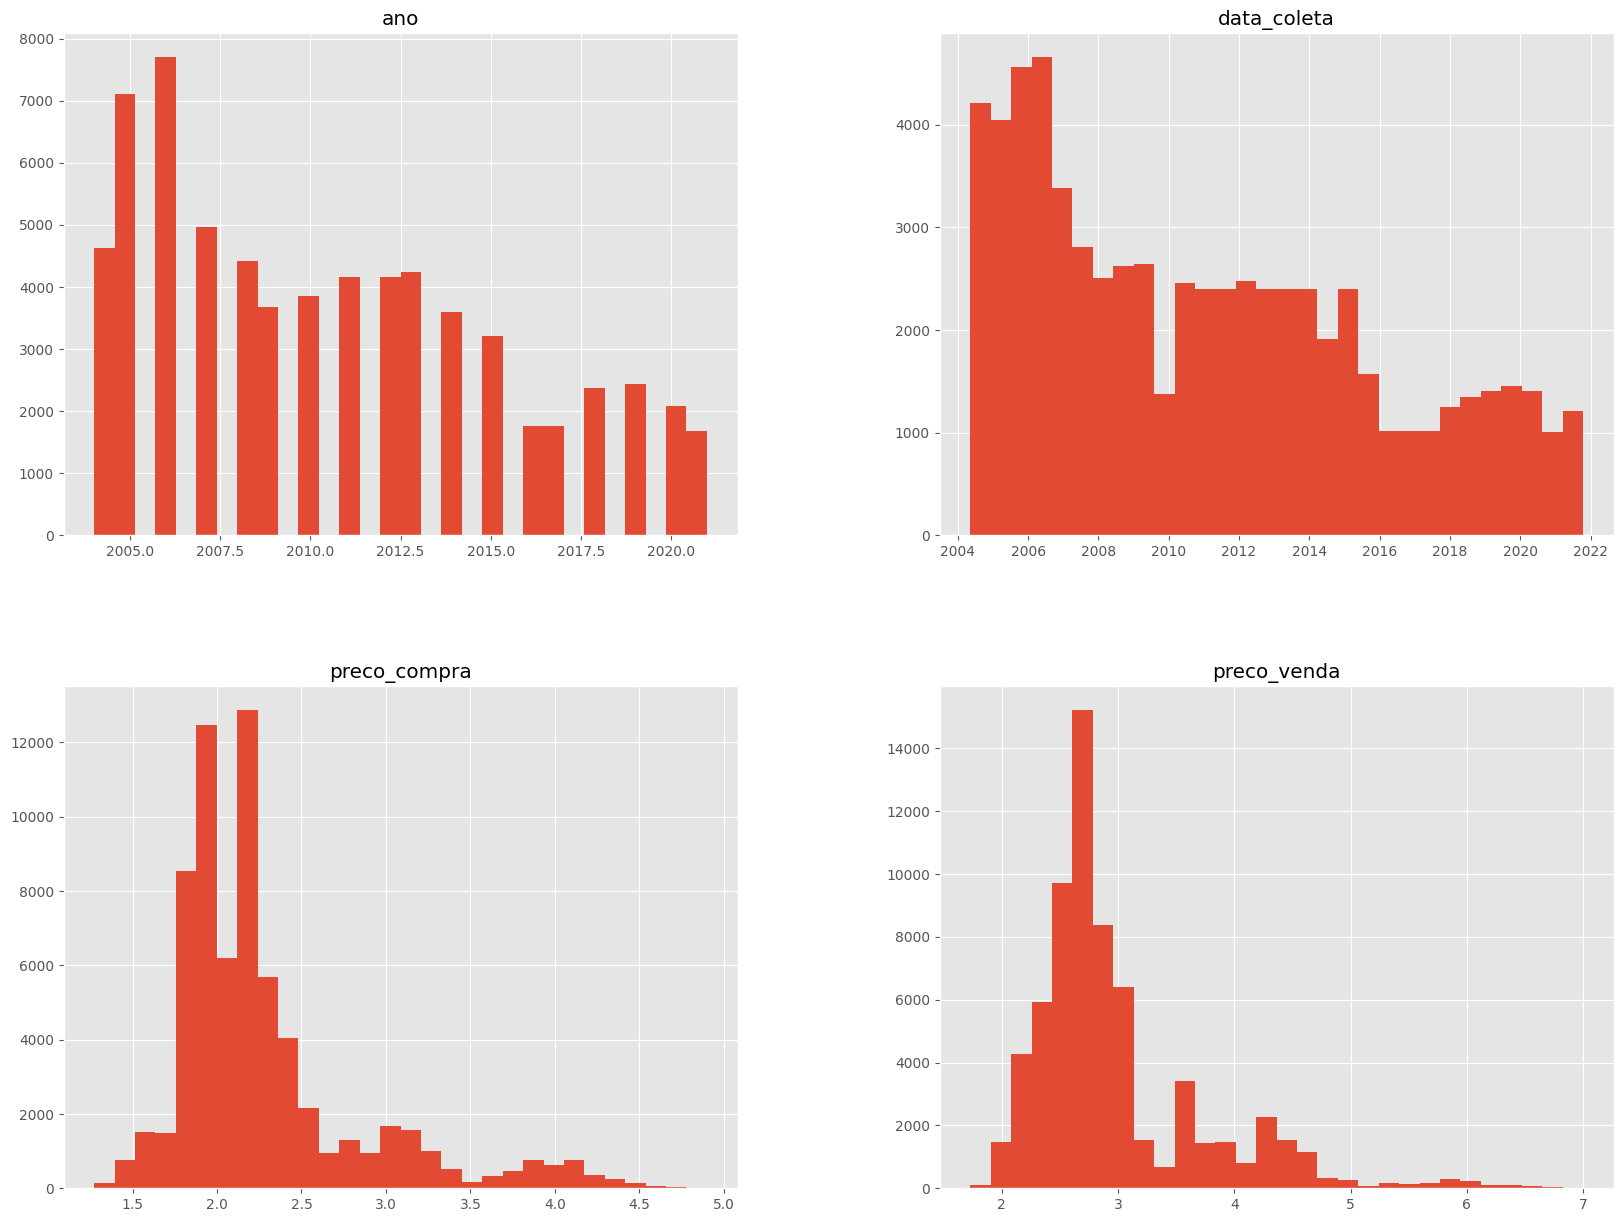

In [22]:
df_gasolina_df.hist(bins=30,figsize=(20,15))

In [23]:
#verificar os anos presentes no dataframe ordenar de forma crescente
lista_anos = df_gasolina_df['data_coleta'].dt.year.unique().tolist()
lista_anos = sorted(lista_anos)
lista_anos

[2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [24]:
#calcular o preco medio de compra por ano
df_preco_compra = df_gasolina_df.groupby(['produto','ano']).preco_compra.mean().reset_index().sort_values(by=['produto','ano'])
df_preco_venda  = df_gasolina_df.groupby(['produto','ano']).preco_venda.mean().reset_index().sort_values(by=['produto','ano']).drop(['ano','produto'],axis=1)

In [25]:
df_produto_ano = pd.concat([df_preco_compra,df_preco_venda],axis=1)

In [26]:
#criar media por ano e nome_estabelecimento venda
df_media_ano_nome_estabelecimento_venda = df_gasolina_df.groupby(['ano','nome_estabelecimento']).preco_venda.mean().reset_index().sort_values(by=['ano','nome_estabelecimento'])
#renomear coluna preco_venda para preco_venda_media
df_media_ano_nome_estabelecimento_venda = df_media_ano_nome_estabelecimento_venda.rename(columns={'preco_venda':'preco_venda_media'})
#pegar o nome do estabelecimento com maior preco medio de venda por ano
df_media_ano_nome_estabelecimento_venda = df_media_ano_nome_estabelecimento_venda.groupby(['ano']).apply(lambda x: x.nlargest(1, 'preco_venda_media')).reset_index(drop=True)


In [27]:
df_media_ano_nome_estabelecimento_venda

,ano,nome_estabelecimento,preco_venda_media
0,2004,POSTO SICILIANO LTDA,2.280000
1,2005,SOUSA & ALVES COMERCIO DE DERIVADOS DE PETROLE...,2.540000
2,2006,AUTO POSTO BR 060 LTDA.,2.670000
3,2007,AUTO POSTO RAMALHO LTDA.,2.657929
4,2008,POSTO RABELO LTDA.,2.630000
5,2009,AUTO POSTO CEILANDIA NORTE LTDA,2.740000
6,2010,AGUAS CLARAS POSTO DE SERVICOS LTDA,2.790000
7,2011,POSTO PARK TAGUATINGA DERIVADOS DE PETROLEO LTDA,2.886667
8,2012,CALLTECH COMBUSTIVEIS E SERVICOS LTDA,2.857000
9,2013,POSTO ITAMARATY LTDA,3.012727


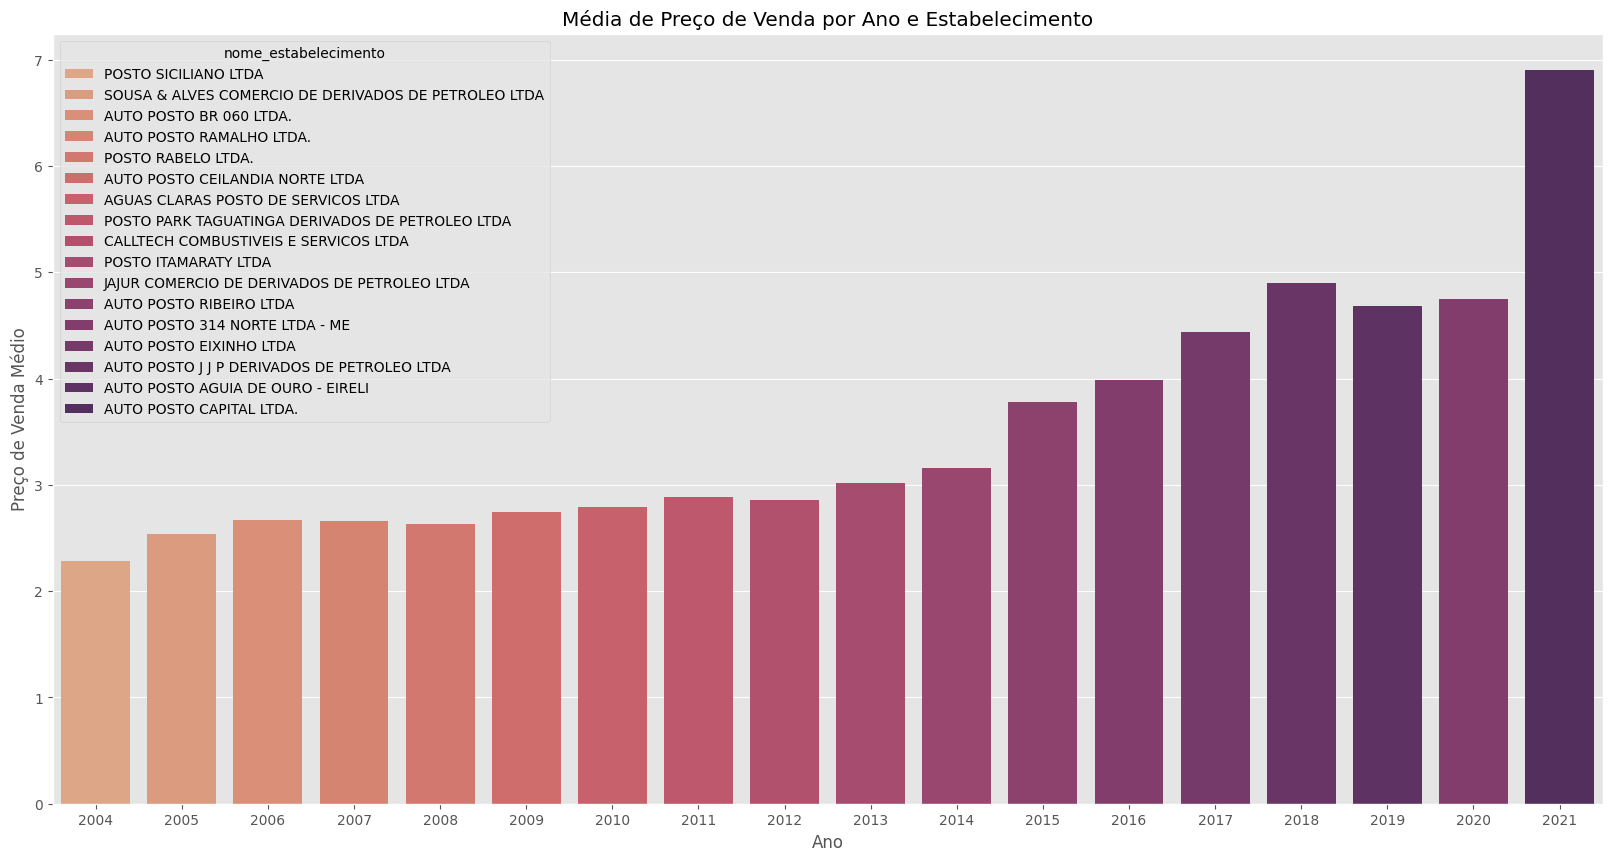

In [28]:
#criar grafico de barras usando o seaborn para comparar os precos de compra e venda por ano
plt.figure(figsize=(20,10))
sns.barplot(x='ano',y='preco_venda_media',data=df_media_ano_nome_estabelecimento_venda,hue='nome_estabelecimento', palette='flare', dodge=False)
plt.title('Média de Preço de Venda por Ano e Estabelecimento')
plt.xlabel('Ano')
plt.ylabel('Preço de Venda Médio')
plt.show() 

In [29]:
#criar media por ano e nome_estabelecimento compra.
df_media_ano_nome_estabelecimento_compra = df_gasolina_df.groupby(['ano','nome_estabelecimento']).preco_compra.mean().reset_index().sort_values(by=['ano','nome_estabelecimento'])
#renomear coluna preco_compra para preco_compra_media
df_media_ano_nome_estabelecimento_compra = df_media_ano_nome_estabelecimento_compra.rename(columns={'preco_compra':'preco_compra_media'})
#pegar o nome do estabelecimento com maior preco medio de compra por ano
df_media_ano_nome_estabelecimento_compra = df_media_ano_nome_estabelecimento_compra.groupby(['ano']).apply(lambda x: x.nlargest(1, 'preco_compra_media')).reset_index(drop=True)



In [30]:
df_media_ano_nome_estabelecimento_compra

,ano,nome_estabelecimento,preco_compra_media
0,2004,ZITAO COMERCIO DE DERIVADOS DO PETROLEO LTDA,2.003564
1,2005,ZITAO COMERCIO DE DERIVADOS DO PETROLEO LTDA,2.240321
2,2006,ZITAO COMERCIO DE DERIVADOS DO PETROLEO LTDA,2.391973
3,2007,RASOL COMERCIO E DISTRIBUICAO DE DERIV. DE PET...,2.287624
4,2008,RASOL COMERCIO E DISTRIBUICAO DE DERIV. DE PET...,2.270718
5,2009,PIONEIRO COMERCIO VAREJISTA DE DERIVADOS DE PE...,2.285029
6,2010,POSTO CIDADE DO AUTOMOVEL LTDA - ME,2.431000
7,2011,POSTO TIRADENTES LTDA,2.452933
8,2012,AUTO POSTO ALMENARA LTDA.,2.564000
9,2013,POSTO DA TORRE EIRELI,2.545571


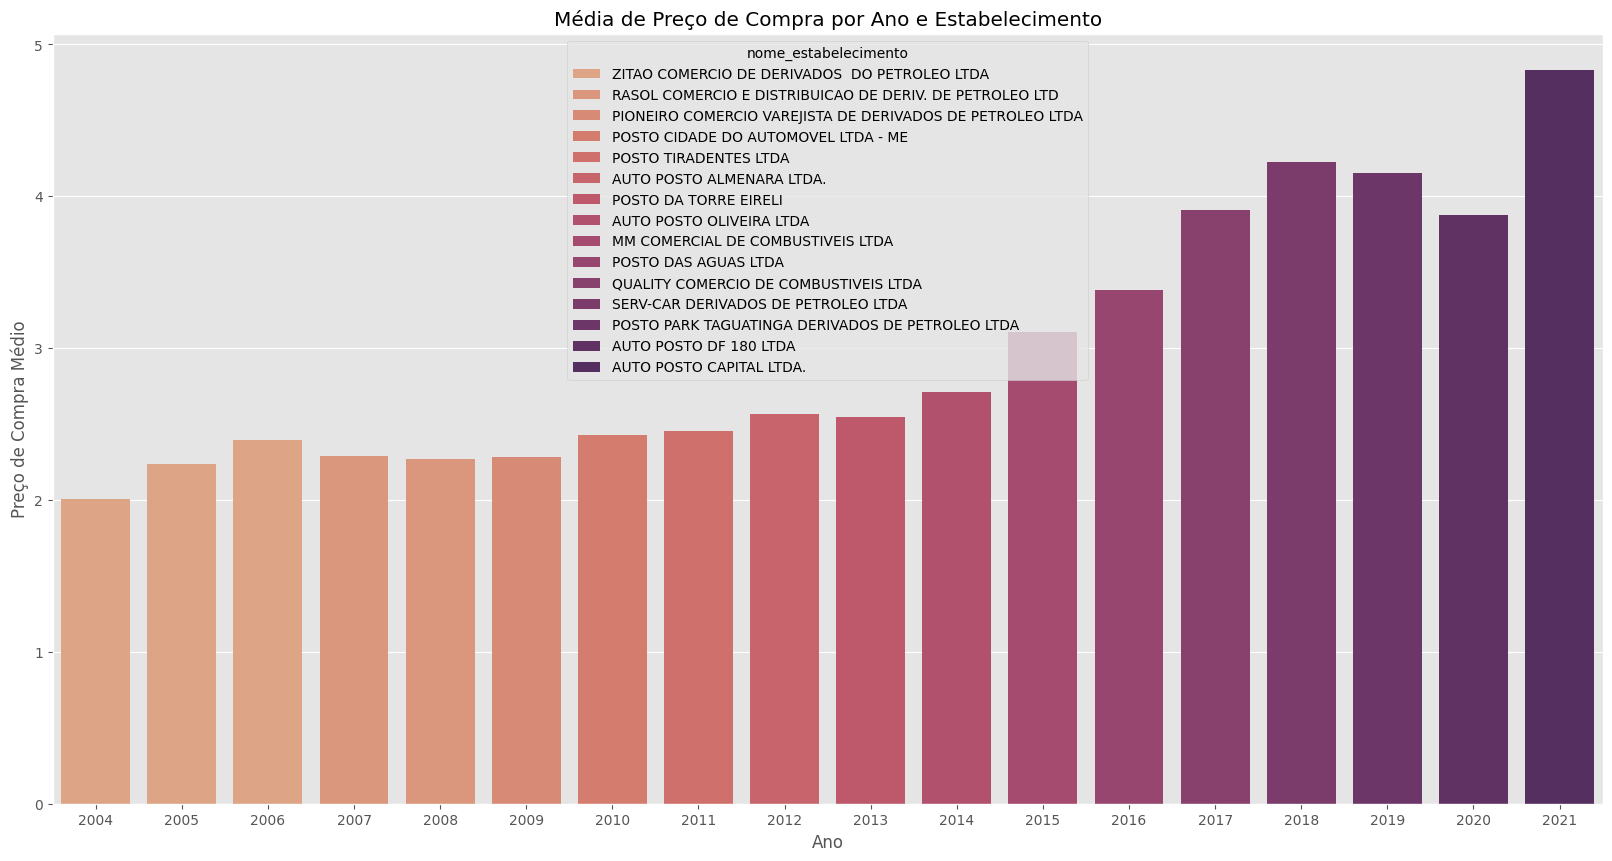

In [31]:
#criar grafico de barras usando o seaborn para comparar os precos de compra e venda por ano
plt.figure(figsize=(20,10))
sns.barplot(x='ano',y='preco_compra_media',data=df_media_ano_nome_estabelecimento_compra,hue='nome_estabelecimento', palette='flare', dodge=False)
plt.title('Média de Preço de Compra por Ano e Estabelecimento')
plt.xlabel('Ano')
plt.ylabel('Preço de Compra Médio')
plt.show() 

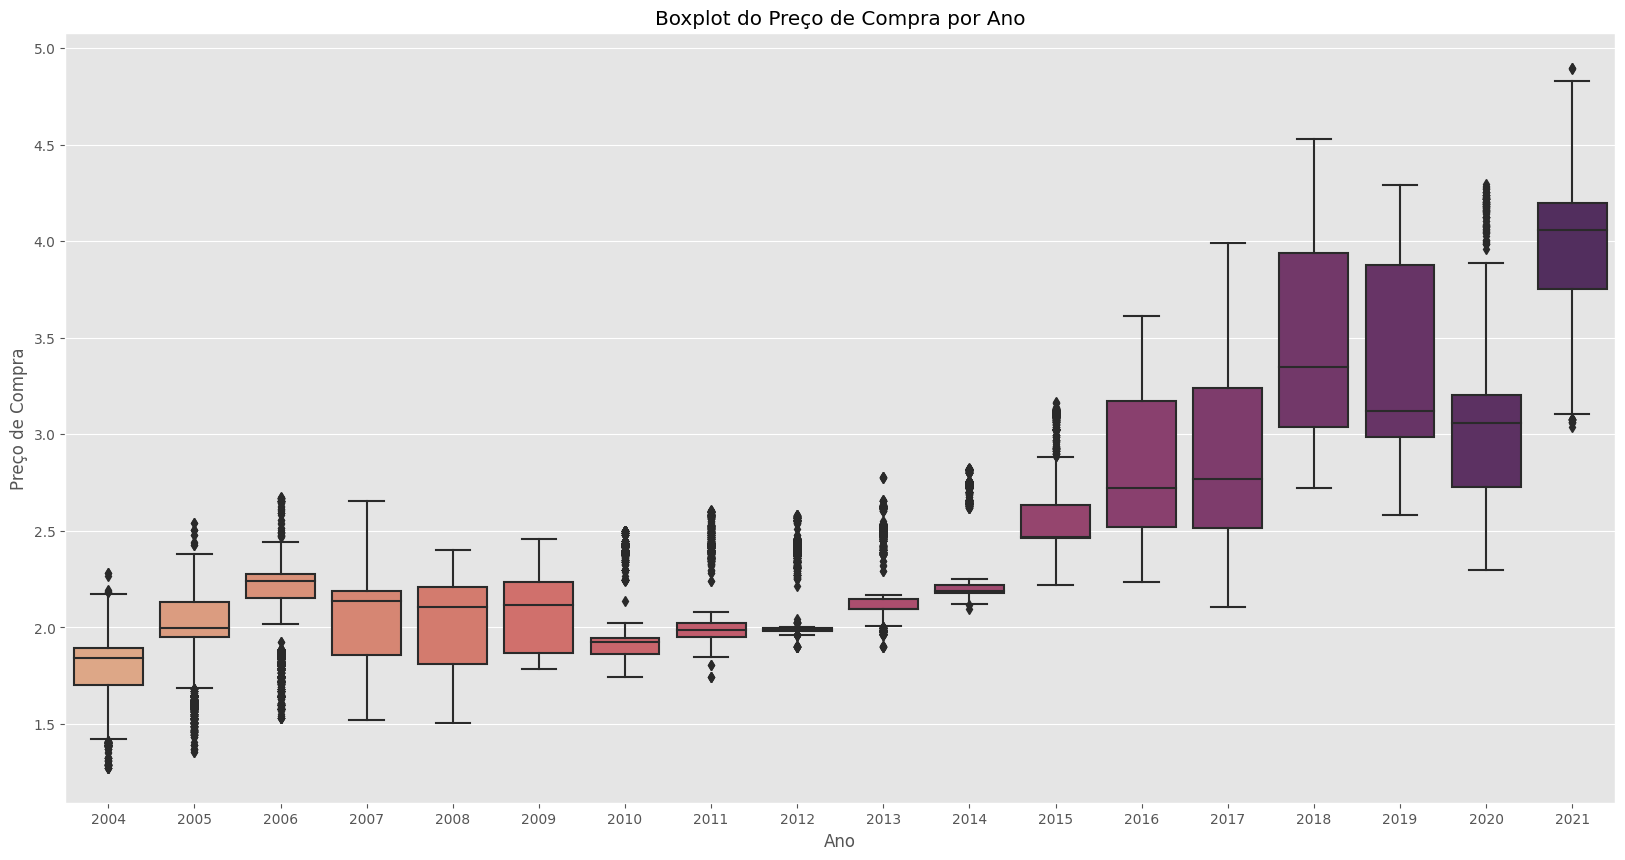

In [32]:
#criar box plot para do preco de compra por ano
plt.figure(figsize=(20,10))
sns.boxplot(x='ano',y='preco_compra',data=df_gasolina_df, palette='flare')
plt.title('Boxplot do Preço de Compra por Ano')
plt.xlabel('Ano')
plt.ylabel('Preço de Compra')
plt.show()

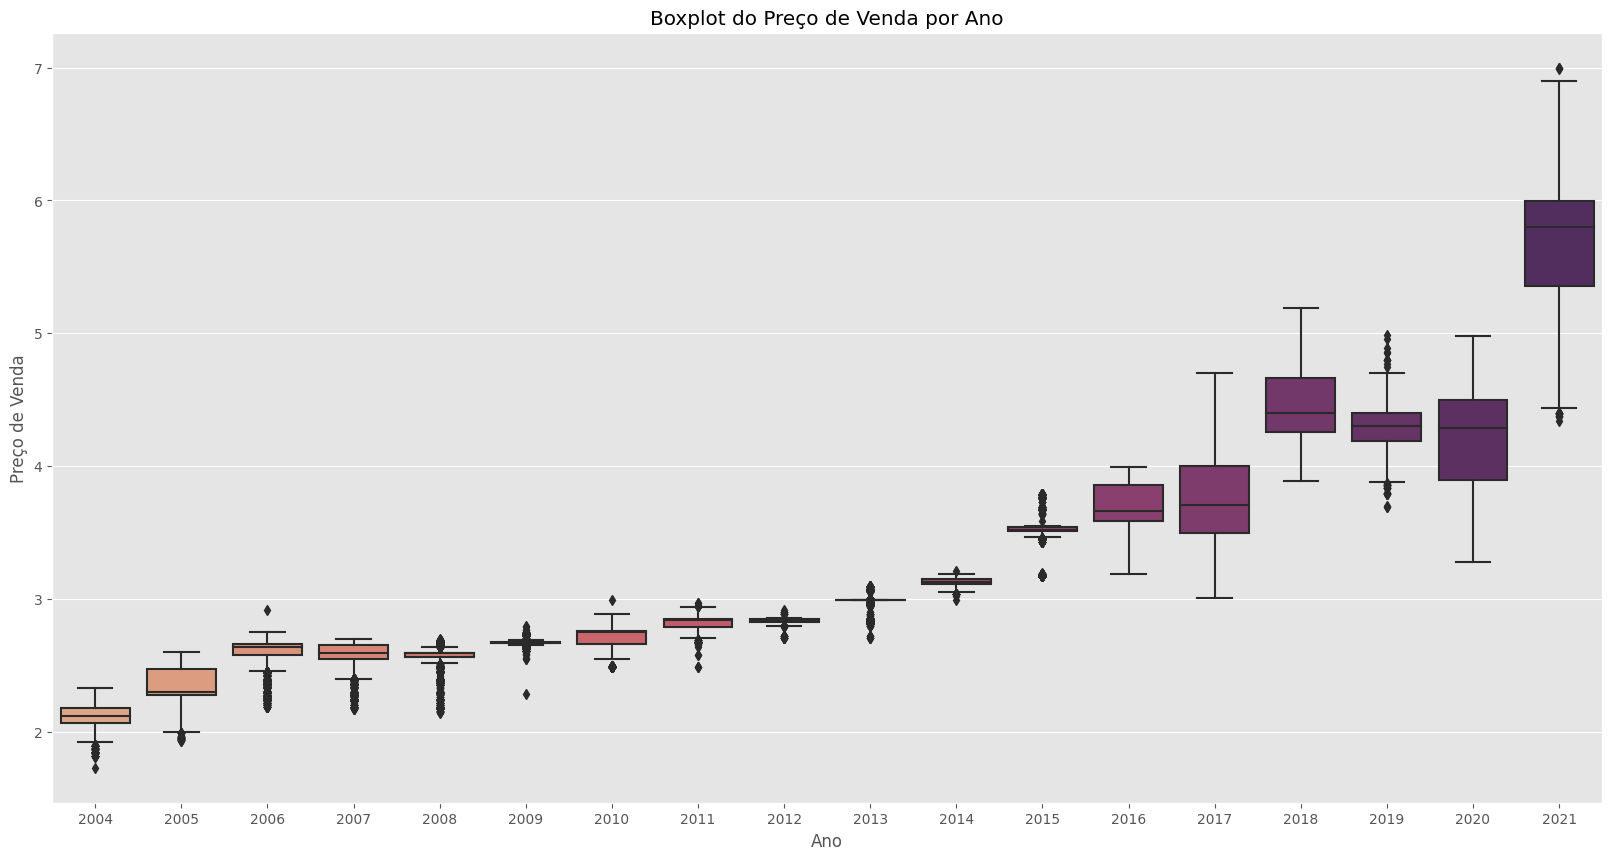

In [33]:
#criar box plot para do preco de venda por ano
plt.figure(figsize=(20,10))
sns.boxplot(x='ano',y='preco_venda',data=df_gasolina_df, palette='flare')
plt.title('Boxplot do Preço de Venda por Ano')
plt.xlabel('Ano')
plt.ylabel('Preço de Venda')
plt.show()

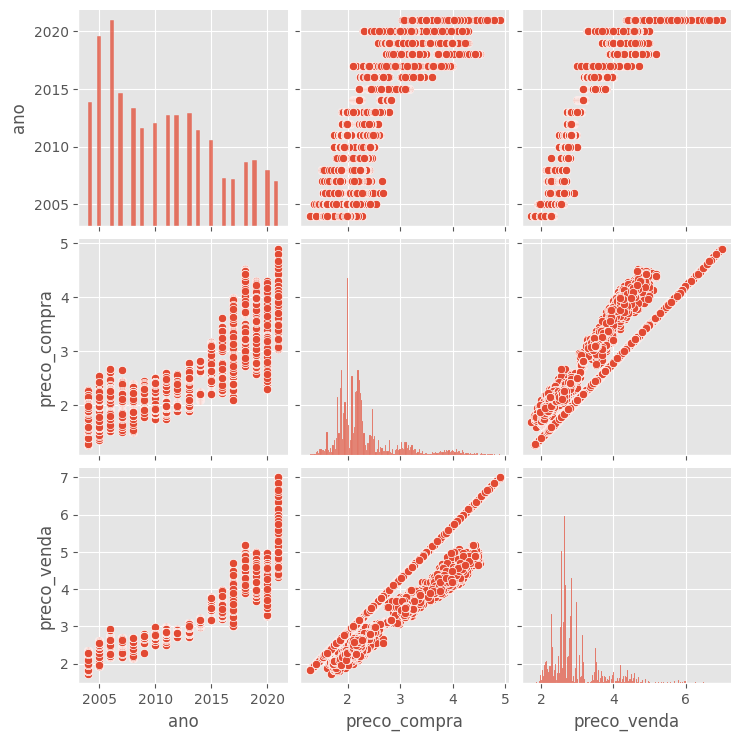

In [34]:
sns.pairplot(df_gasolina_df)
plt.show()


In [35]:
df_corr = df_gasolina_df.corr()

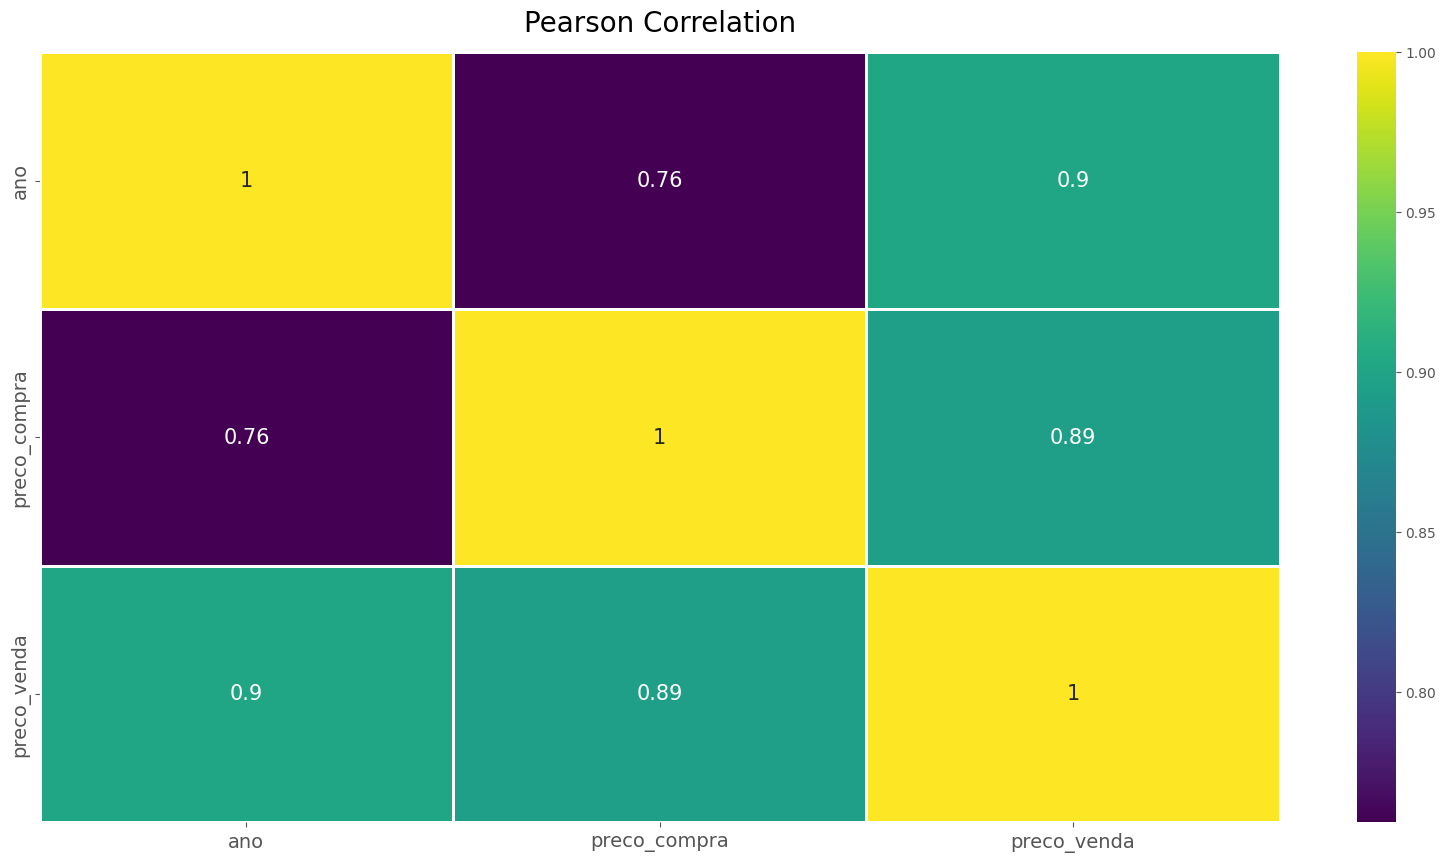

In [36]:
# Visualizar a correlação entre cada variável utilizando a correlação de Pearson 
_ = plt.figure(figsize = (20,10))
res = sns.heatmap(df_corr, vmax = 1, linewidths = 0.9, cmap = 'viridis',annot_kws={"size": 15},annot=True)
_ = plt.title('Pearson Correlation', fontsize = 20, pad = 15)
_ = res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
_ = res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)

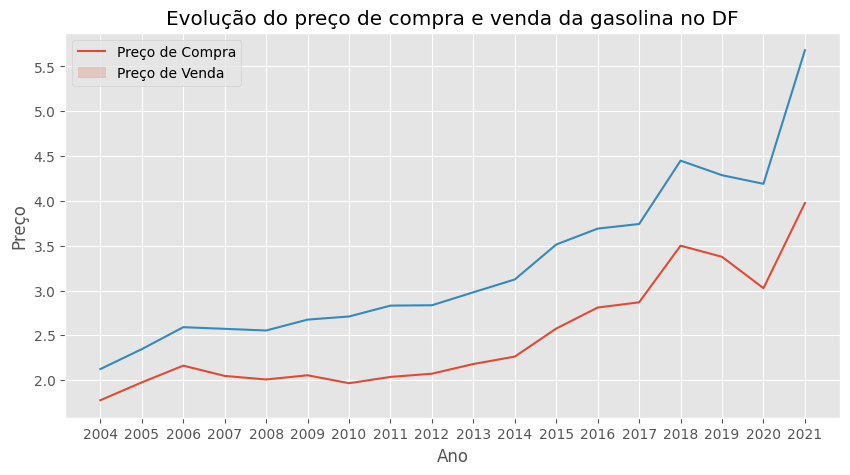

In [37]:
#criar lineplot para visualizar a evolução do preço de compra e venda da gasolina no DF
plt.figure(figsize=(10,5))
sns.lineplot(x='ano',y='preco_compra',data=df_produto_ano)
sns.lineplot(x='ano',y='preco_venda',data=df_produto_ano)
plt.title('Evolução do preço de compra e venda da gasolina no DF')
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.legend(['Preço de Compra','Preço de Venda'])
#mostrar todos os anos no eixo x
plt.xticks(lista_anos)
plt.show()


In [38]:
#Criar tabela com Frequencia, Percentual, Cumulativa Frequencia e Cumulativa Percentual por ano
df_freq_ano = pd.DataFrame(df_gasolina_df['ano'].value_counts()).reset_index()
df_freq_ano.columns = ['ano','frequencia']
df_freq_ano['percentual'] = df_freq_ano['frequencia']/df_freq_ano['frequencia'].sum()
df_freq_ano['cumulativa_frequencia'] = df_freq_ano['frequencia'].cumsum()
df_freq_ano['cumulativa_percentual'] = df_freq_ano['percentual'].cumsum()
#transformar a coluna percentual e cumulativa_percentual em porcentagem
df_freq_ano['percentual'] = df_freq_ano['percentual'].apply(lambda x: '{:.2%}'.format(x))
df_freq_ano['cumulativa_percentual'] = df_freq_ano['cumulativa_percentual'].apply(lambda x: '{:.2%}'.format(x))
df_freq_ano


,ano,frequencia,percentual,cumulativa_frequencia,cumulativa_percentual
0,2006,7700,11.35%,7700,11.35%
1,2005,7102,10.47%,14802,21.83%
2,2007,4972,7.33%,19774,29.16%
3,2004,4628,6.82%,24402,35.98%
4,2008,4411,6.50%,28813,42.49%
5,2013,4240,6.25%,33053,48.74%
6,2012,4160,6.13%,37213,54.87%
7,2011,4159,6.13%,41372,61.01%
8,2010,3848,5.67%,45220,66.68%
9,2009,3677,5.42%,48897,72.10%


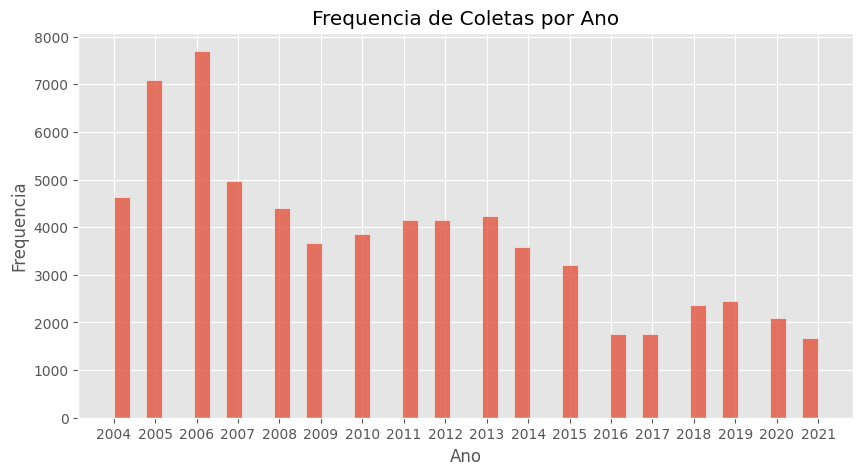

In [39]:
#histograma para visualizar a frequencia de coletas por ano
plt.figure(figsize=(10,5))
sns.histplot(x='ano',data=df_gasolina_df)
plt.title('Frequencia de Coletas por Ano')
plt.xlabel('Ano')
plt.ylabel('Frequencia')
#mostrar todos os anos no eixo x
plt.xticks(lista_anos)
plt.show()

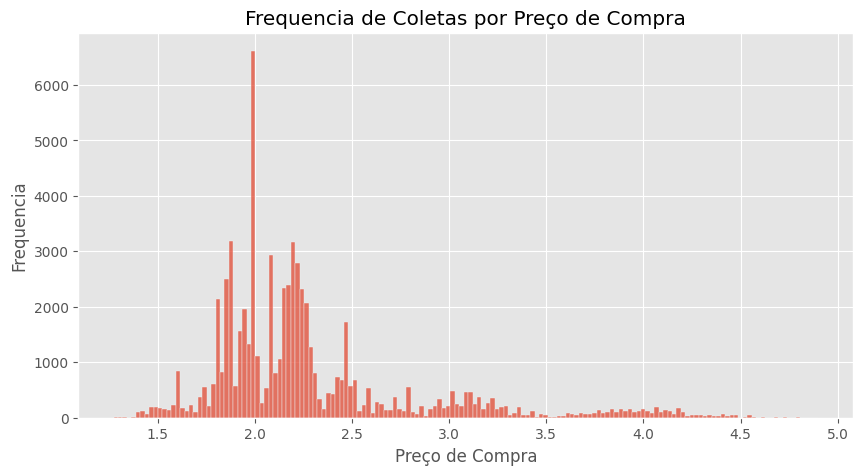

In [40]:
#grafico de frequencia de do preco de compra por ano
plt.figure(figsize=(10,5))
sns.histplot(x='preco_compra',data=df_gasolina_df)
plt.title('Frequencia de Coletas por Preço de Compra')
plt.xlabel('Preço de Compra')
plt.ylabel('Frequencia')
plt.show()



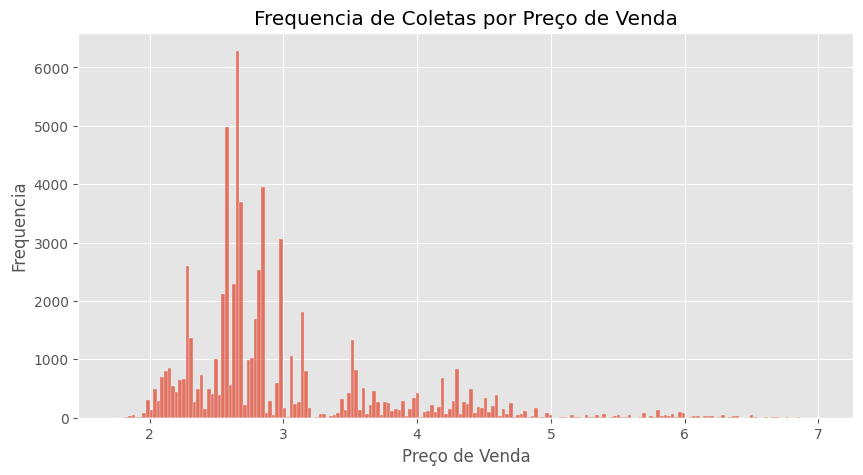

In [41]:
#grafico de frequencia de do preco de venda por ano
plt.figure(figsize=(10,5))
sns.histplot(x='preco_venda',data=df_gasolina_df)
plt.title('Frequencia de Coletas por Preço de Venda')
plt.xlabel('Preço de Venda')
plt.ylabel('Frequencia')
plt.show()


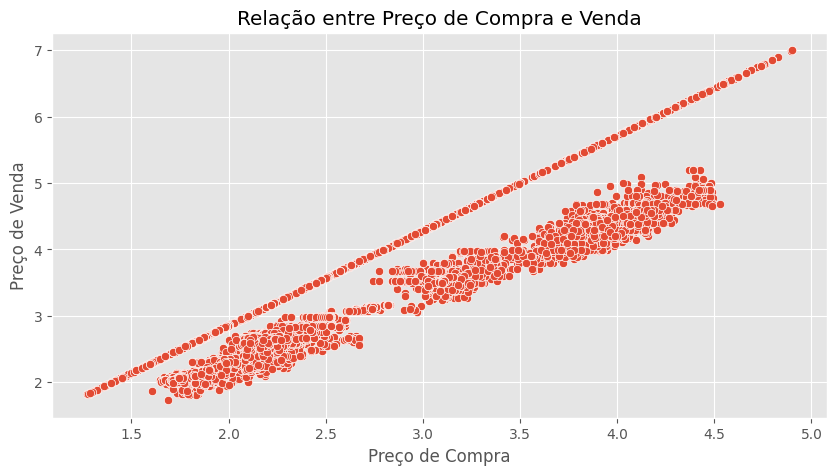

In [42]:
#grafico de dispersão para visualizar a relação entre preco de compra e venda
plt.figure(figsize=(10,5))
sns.scatterplot(x='preco_compra',y='preco_venda',data=df_gasolina_df)
plt.title('Relação entre Preço de Compra e Venda')
plt.xlabel('Preço de Compra')
plt.ylabel('Preço de Venda')
plt.show()

In [43]:
df_gasolina_df

,ano,sigla_uf,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,data_coleta,produto,unidade_medida,preco_compra,preco_venda,municipio
0,2017,DF,72025-001,QUADRA QSE AREA ESPECIAL PARA POSTO DE COMBUST...,00.306.597/0068-04,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,PETROBRAS DISTRIBUIDORA S.A.,2017-01-19,gasolina,R$/litro,2.6733,3.819,Brasília
1,2016,DF,71710-300,"VIA NB,1 PLL 03",04.285.663/0001-50,AUTO POSTO DO NUCLEO LTDA,PETROBRAS DISTRIBUIDORA S.A.,2016-02-17,gasolina,R$/litro,3.3468,3.970,Brasília
2,2005,DF,72314-701,"QI 416 CONJUNTO H, LOTE 01",00.097.626/0006-72,BRASAL COMBUSTIVEIS LTDA,RAIZEN,2005-01-17,gasolina,R$/litro,1.9713,2.109,Brasília
3,2014,DF,71725-260,"SPM SPM EPIA SUL CONJUNTO A LOTE 10 N,S/N",37.149.861/0005-70,CONTAGEM DERIVADOS DE PETRÓLEO LTDA.,PETROBRAS DISTRIBUIDORA S.A.,2014-02-25,gasolina,R$/litro,2.1490,3.070,Brasília
4,2014,DF,72120-190,"QNL 30 CONJUNTO A LOTE,12",38.057.394/0001-97,POSTO ESTRADA PARK LTDA,BRANCA,2014-02-25,gasolina,R$/litro,2.1490,3.070,Brasília
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67812,2014,DF,73070-043,"AE-ÁREA ESPECIAL AREA ESPECIAL,2 POSTO GASOLINA",00.603.738/0006-58,GASOL COMBUSTÍVEIS AUTOMOTIVOS LTDA.,IPIRANGA,2014-12-29,gasolina,R$/litro,2.8191,3.170,Brasília
67813,2010,DF,71675-000,"SHIS/SUL PAG QI 27 BLOCO A,S/N",05.000.684/0002-26,AUTO POSTO PETER PAN 01 LTDA,PETROBRAS DISTRIBUIDORA S.A.,2010-11-30,gasolina,R$/litro,2.4210,2.790,Brasília
67814,2010,DF,70310-500,"SETOR DE ÁREAS ISOLADAS DE OFICINA NORTE,1 QUA...",03.951.672/0001-70,AUTO POSTO SOF NORTE LTDA,RAIZEN,2010-12-07,gasolina,R$/litro,1.9320,2.760,Brasília
67815,2010,DF,71715-056,"RODOVIA DF 130 COM A RODOVIA DF 230,S/N",07.214.648/0001-00,POSTO PARAISO LTDA,PETROBRAS DISTRIBUIDORA S.A.,2010-12-07,gasolina,R$/litro,1.9530,2.790,Brasília


In [44]:
#Resumindo por Valor Médio de Venda
df_media_preco_venda = df_gasolina_df.groupby('data_coleta')['preco_venda'].mean()
#transformar df_media_preco_venda em dataframe
df_media_preco_venda = pd.DataFrame(df_media_preco_venda).reset_index()
#transformar a coluna data_coleta em index
df_media_preco_venda = df_media_preco_venda.set_index('data_coleta')

In [45]:
df_media_preco_venda

,preco_venda
data_coleta,
2004-05-10,2.028655
2004-05-11,2.027500
2004-05-12,2.033000
2004-05-17,2.025924
2004-05-18,2.024246
...,...
2021-09-30,6.162000
2021-10-04,6.216283
2021-10-07,6.792000


In [46]:
#criar uma copia do dataframe df_media_preco_venda
dados = df_media_preco_venda.copy()

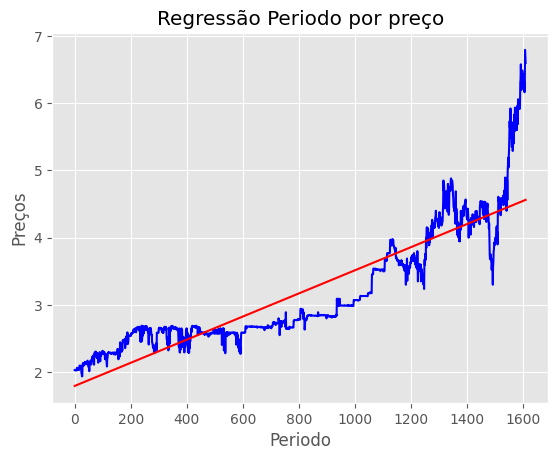

In [47]:
#Plotar gráfico de Periodo e preços

X = [i for i in range(0, len(dados))]
X = np.reshape(X, (len(X), 1))
y = dados
modelo = LinearRegression()
modelo.fit(X, y)

modelo.coef_
tendencia = modelo.predict(X)

plt.plot(dados.values, color='blue',label='Original')
plt.plot(tendencia,color='red', label='Tendência' )
plt.title('Regressão Periodo por preço')
plt.xlabel('Periodo')
plt.ylabel('Preços')
plt.show()

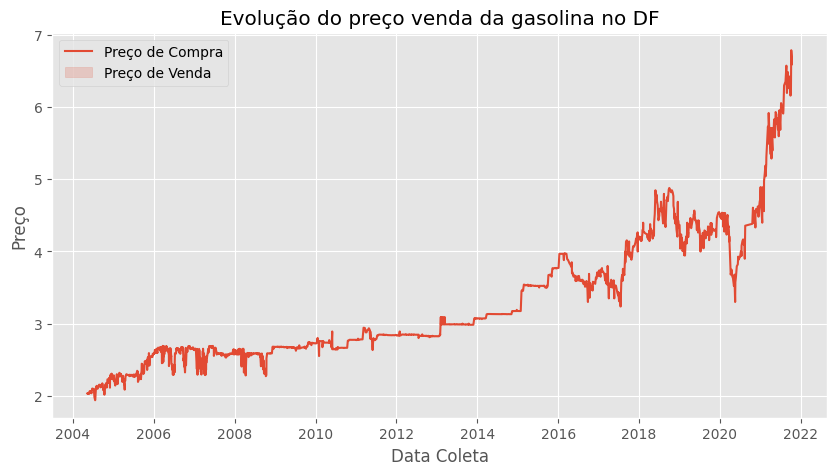

In [48]:
#criar grafico de linha para visualizar a evolução do preço de compra e venda da gasolina no DF
plt.figure(figsize=(10,5))
sns.lineplot(x='data_coleta',y='preco_venda',data=dados)
plt.title('Evolução do preço venda da gasolina no DF')
plt.xlabel('Data Coleta')
plt.ylabel('Preço')
plt.legend(['Preço de Compra','Preço de Venda'])
plt.show()


In [49]:
#arredondar a coluna preco_compra e preco_venda para duas casas decimais
df_media_preco = dados.round({'preco_venda':2})

In [50]:
df_media_preco

,preco_venda
data_coleta,
2004-05-10,2.03
2004-05-11,2.03
2004-05-12,2.03
2004-05-17,2.03
2004-05-18,2.02
...,...
2021-09-30,6.16
2021-10-04,6.22
2021-10-07,6.79


In [51]:
df_media_preco

,preco_venda
data_coleta,
2004-05-10,2.03
2004-05-11,2.03
2004-05-12,2.03
2004-05-17,2.03
2004-05-18,2.02
...,...
2021-09-30,6.16
2021-10-04,6.22
2021-10-07,6.79


In [52]:
#criar uma copia do dataframe df_media_preco
dados = df_media_preco.copy()
#resetar o index
dados = dados.reset_index()

In [53]:
dados

,data_coleta,preco_venda
0,2004-05-10,2.03
1,2004-05-11,2.03
2,2004-05-12,2.03
3,2004-05-17,2.03
4,2004-05-18,2.02
...,...,...
1604,2021-09-30,6.16
1605,2021-10-04,6.22
1606,2021-10-07,6.79
1607,2021-10-11,6.71


In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 640x480 with 0 Axes>

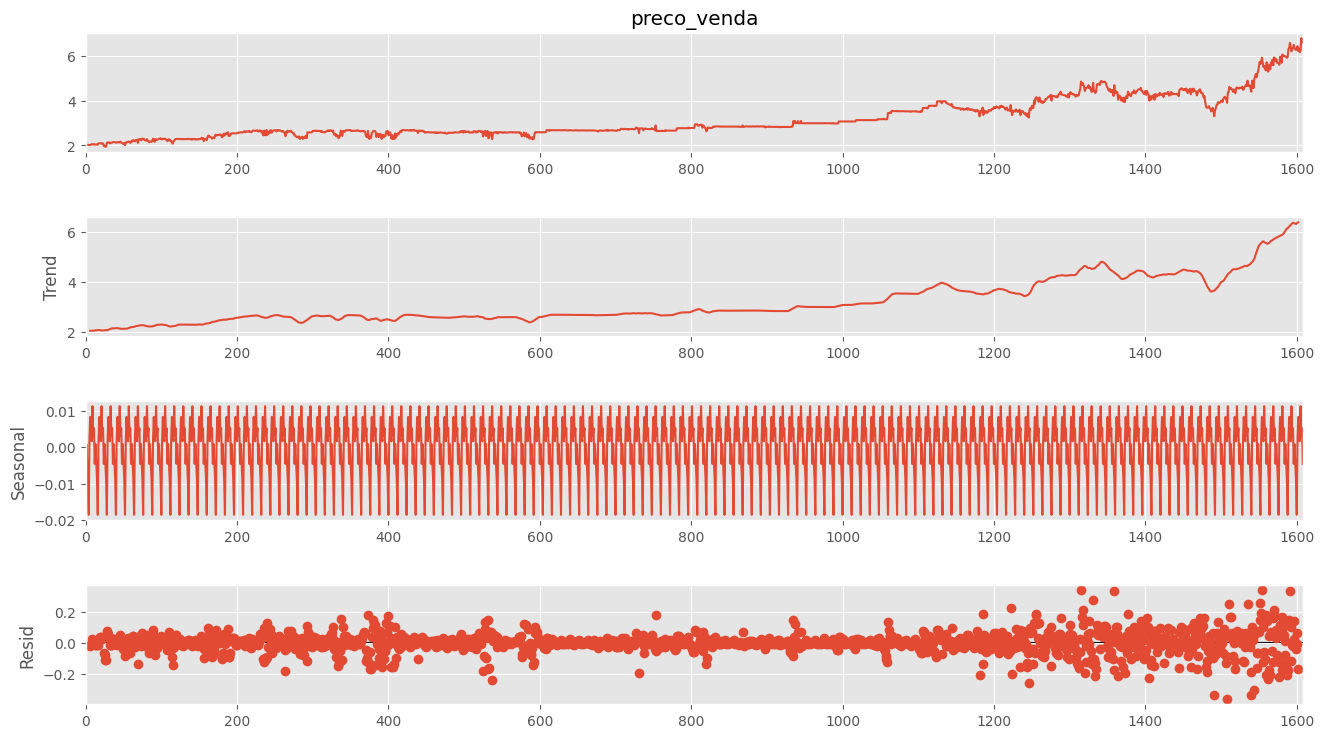

In [55]:
#Decomposition of Time Series
decomposition = seasonal_decompose(dados['preco_venda'], model='additive', period=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)


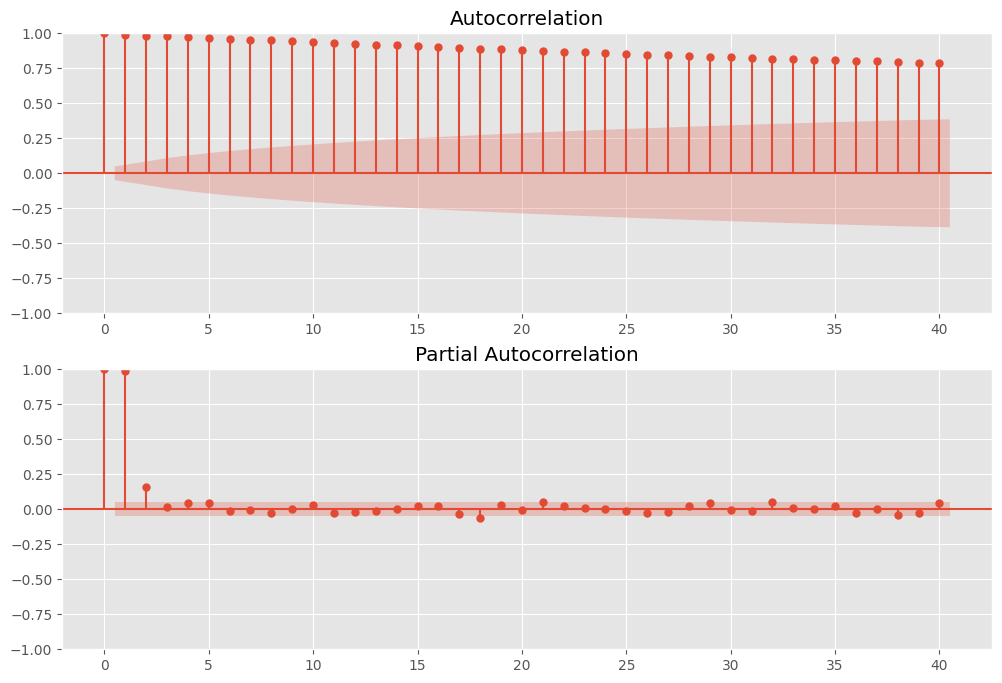

In [56]:
#verificar ACF e PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_media_preco['preco_venda'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_media_preco['preco_venda'], lags=40, ax=ax2)


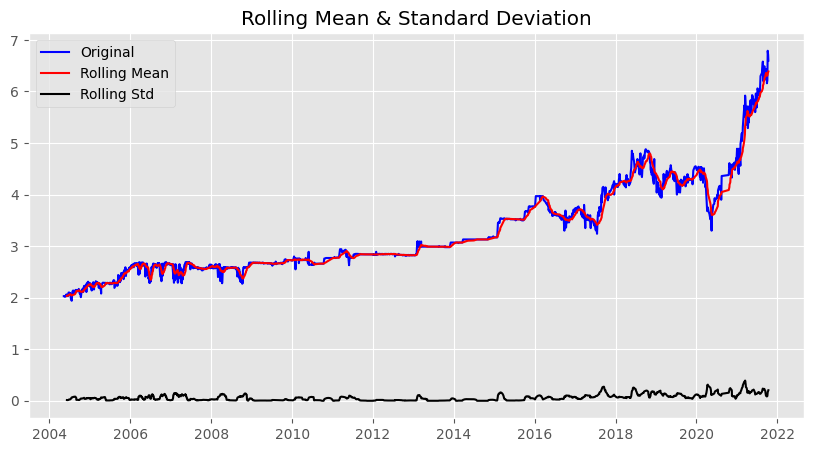

In [57]:
# Rolling Mean & Rolling Standard Deviation
rolmean = df_media_preco['preco_venda'].rolling(window=12).mean()
rolstd = df_media_preco['preco_venda'].rolling(window=12).std()

# Plot rolling statistics:
plt.figure(figsize=(10,5))
orig = plt.plot(df_media_preco['preco_venda'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)
